In [2]:
# %pip install matplotlib
# %pip install pandas
# %pip install requests

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import matplotlib.colors as mcolors

In [4]:
# this list contatins the years where we want to gather the data
# http://fenyi.solarobs.epss.hun-ren.hu/ftp/pub/DPD/data/
# the site only goes up to 2018
list_of_years = [1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
sunspot_latitudes = dict()


In [5]:
def getData(year):
    url = f"http://fenyi.solarobs.epss.hun-ren.hu/ftp/pub/DPD/data/DPD{year}.txt"
    response = requests.get(url)

    if response.status_code != 200:
        print(f"Could not connect to {url}")
    else:
        content = response.text
        lines = content.splitlines()
        for line in lines:
            if line.startswith("g"):
                row = line.split()
                
                # row[1] = year
                # row[2] = month
                # row[3] = day
                # row[4] = hour
                # row[5] = minute
                # row[6] = second
                # row[7] = sunspot group number
                # row[11] = Total corrected WS whole spot area of the group in millionths of the solar hemisphere
                # row[12] = Heliographic latitude B; positive: North, negative: South

                
                if row[7].isdigit():
                    if float(row[12]) <= 90 and float(row[12]) >= -90:
                        try:
                            sunspot_latitudes[datetime(year, int(row[2]), int(row[3]))].append((float(row[11]), float(row[12])))
                        except:
                            sunspot_latitudes[datetime(year, int(row[2]), int(row[3]))] = [(float(row[11]), float(row[12]))]
                            # (int(row[11]), float(row[12]))

                        
    

In [6]:
for year in list_of_years:
    getData(year)

Average sunspot area: 171.0844388131953


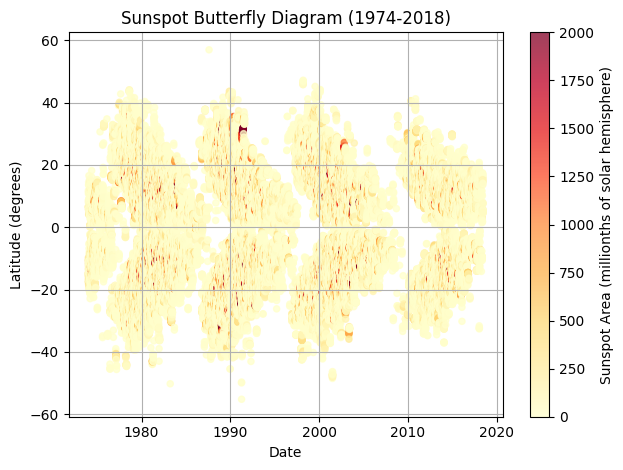

In [10]:
# Prepare data for plotting
dates = []
latitudes = []
areas = []

for date, spots in sunspot_latitudes.items():
    for area, latitude in spots:
        dates.append(date)
        latitudes.append(latitude)
        areas.append(area)

print("Average sunspot area:", sum(areas)/len(areas))

# Convert data to numpy arrays for easier manipulation
dates = np.array(dates)
latitudes = np.array(latitudes)
areas = np.array(areas)

# Create a custom normalization based on the actual min and max of the sunspot areas
norm = mcolors.Normalize(vmin=np.min(areas), vmax=2000)

# Use scatter plot where color is mapped to the raw sunspot area
scatter = plt.scatter(dates, latitudes, c=areas, cmap='YlOrRd', norm=norm, s=20, alpha=0.75)

# Improve x-axis formatting for dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Major ticks every 10 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Latitude (degrees)')
plt.title('Sunspot Butterfly Diagram (1974-2018)')

# Add a colorbar that now reflects the actual sunspot area values
cbar = plt.colorbar(scatter)
cbar.set_label('Sunspot Area (millionths of solar hemisphere)')

plt.grid(True)
plt.tight_layout()
plt.show()